# Final Project: Car Price Prediction
### Name: Jingkai Wang, Qixiang Jiang, Ruisi Wang, Xiaoli Fang
#### Due Date: 8/15/2023
#### Prof. Bilal Ahmed
#### DS 4400 

# New Data Set
### We found that our original one did not include the enough data then we change a similar but larger one.
### Link：https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [1]:
# Import all libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score

# Read data as pd dataframe

In [2]:
# Load the dataset
data=pd.read_csv('CarPrice_Assignment.csv')

# Display the first few rows of the dataframe to understand its structure
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# chech if there exist a null value
sum_null_values = data.isnull().sum()
sum_null_df = pd.DataFrame(sum_null_values, columns=['sum_null'])

# check null value
print(sum_null_df)

                  sum_null
car_ID                   0
symboling                0
CarName                  0
fueltype                 0
aspiration               0
doornumber               0
carbody                  0
drivewheel               0
enginelocation           0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginetype               0
cylindernumber           0
enginesize               0
fuelsystem               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0


# Data cleaning

as we see car_ID is not useful,let's drop this column

In [4]:
# Drop the 'car_ID' column as it's considered useless.
data.drop('car_ID', axis=1, inplace=True)

# Extract the first part of the 'CarName' column to retain only the car's brand name.
data['CarName'] = data['CarName'].str.split(' ', expand=True)[0]

# Display the first few rows of the modified DataFrame.
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


let's see the main names of cars 

unique names of cars

In [5]:
# check car column 
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

there are some false car names,let's change them  to true

In [6]:
# Correct misspelled car brand names in the 'CarName' column using the replace method.
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

# Convert the 'symboling' column to the string data type (categorical).
data['symboling'] = data['symboling'].astype('str')

# Display the unique values in the 'CarName' column after the corrections.
data['CarName'].unique()

# Create a list of column names that contain categorical data (object type).
categorical_cols = data.select_dtypes(include=['object']).columns

# Display the first 5 rows of the DataFrame for the categorical columns.
data[categorical_cols].head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


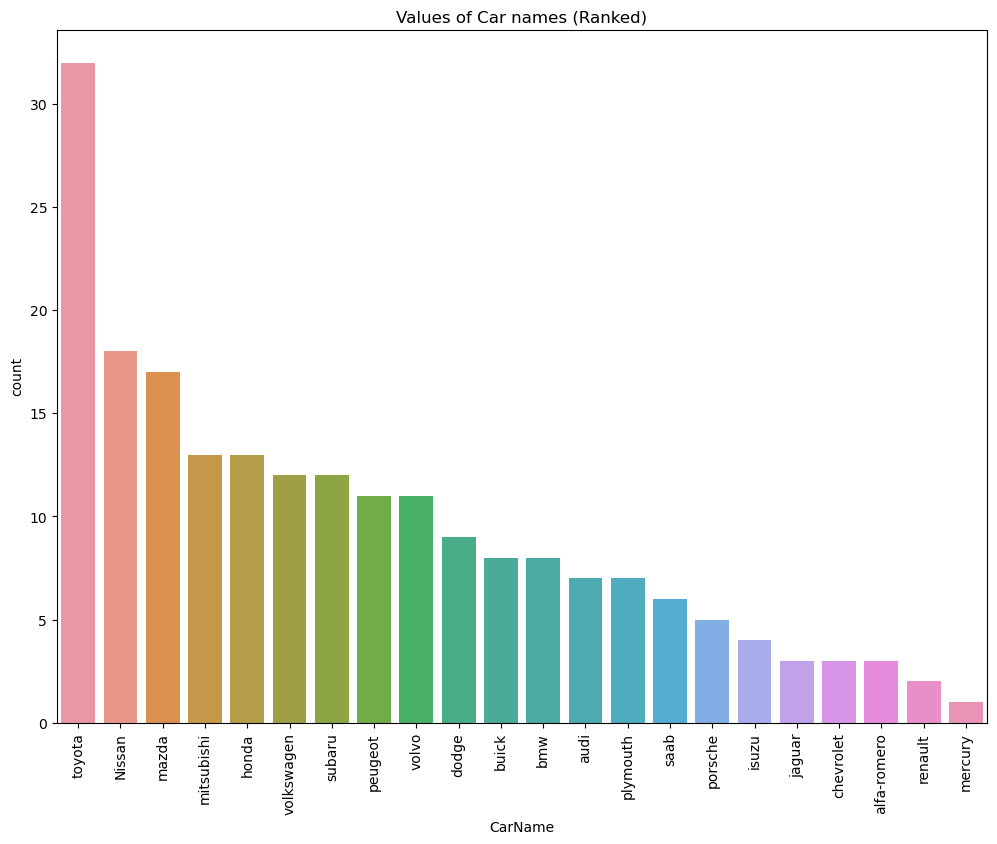

In [7]:
# plot the values of car names
plt.figure(figsize=(12, 9))
sns.countplot(x='CarName', data=data, order=data['CarName'].value_counts().index)  # Order by value counts
plt.xticks(rotation=90)
plt.title('Values of Car names (Ranked)')
plt.show()

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object.
le = LabelEncoder()

# Encode the 'CarName' column to numeric values.
data['CarName'] = le.fit_transform(data['CarName'])

# Encode the 'fueltype' column to numeric values.
data['fueltype'] = le.fit_transform(data['fueltype'])

# Encode the 'aspiration' column to numeric values.
data['aspiration'] = le.fit_transform(data['aspiration'])

# Encode the 'doornumber' column to numeric values.
data['doornumber'] = le.fit_transform(data['doornumber'])

# Encode the 'carbody' column to numeric values.
data['carbody'] = le.fit_transform(data['carbody'])

# Encode the 'drivewheel' column to numeric values.
data['drivewheel'] = le.fit_transform(data['drivewheel'])

# Encode the 'enginelocation' column to numeric values.
data['enginelocation'] = le.fit_transform(data['enginelocation'])

# Encode the 'enginetype' column to numeric values.
data['enginetype'] = le.fit_transform(data['enginetype'])

# Encode the 'cylindernumber' column to numeric values.
data['cylindernumber'] = le.fit_transform(data['cylindernumber'])

# Encode the 'fuelsystem' column to numeric values.
data['fuelsystem'] = le.fit_transform(data['fuelsystem'])


# Data visualization for car price

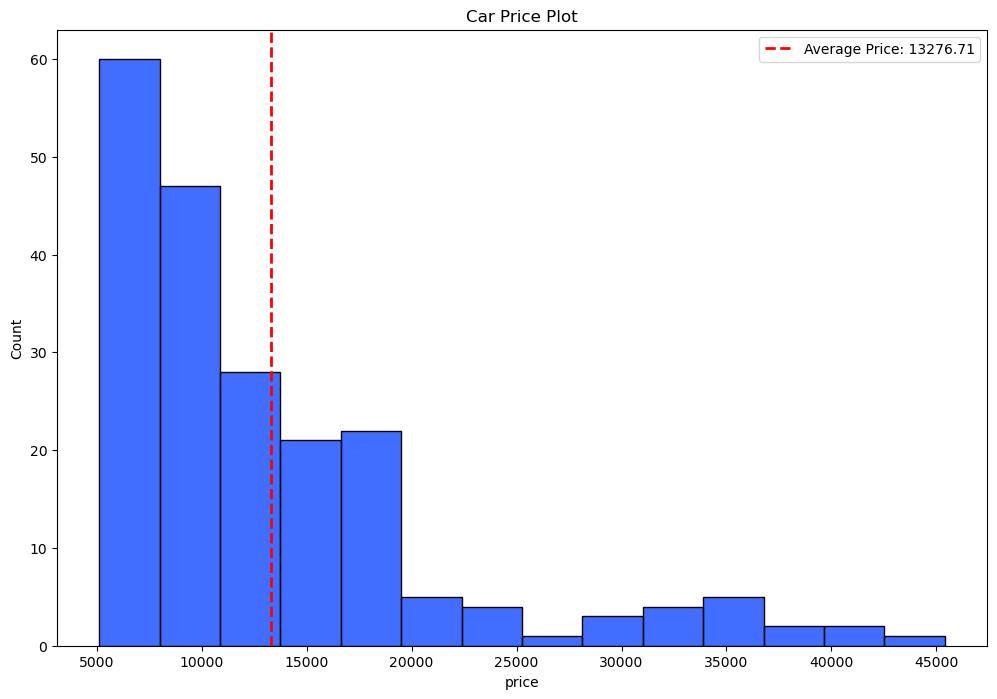

In [9]:
plt.figure(figsize=(12, 8))
sns.set_palette('bright')
plt.title('Car Price Plot')
sns.histplot(data['price'])
avg_price = data['price'].mean()  # Calculate the average price
plt.axvline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Average Price: {avg_price:.2f}')
plt.legend()
plt.show()

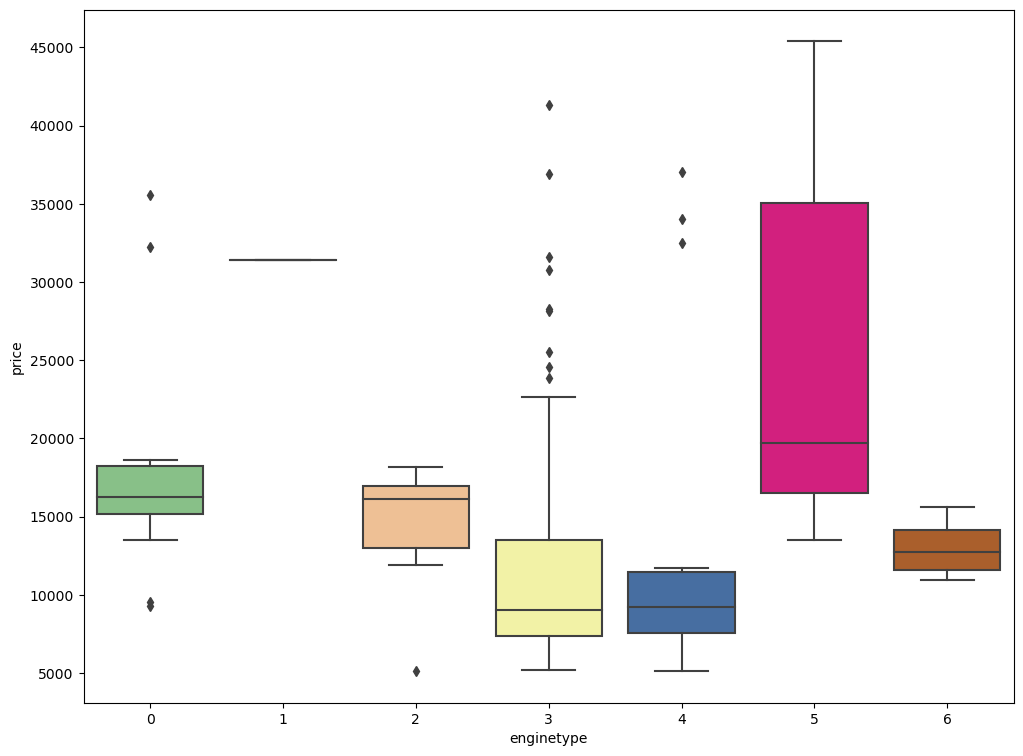

In [10]:
# give a plot which would show the price range according to the enginetype
plt.figure(figsize=(12,9))
sns.boxplot(x = 'enginetype', y = 'price', data = data,palette='Accent')

plt.show()

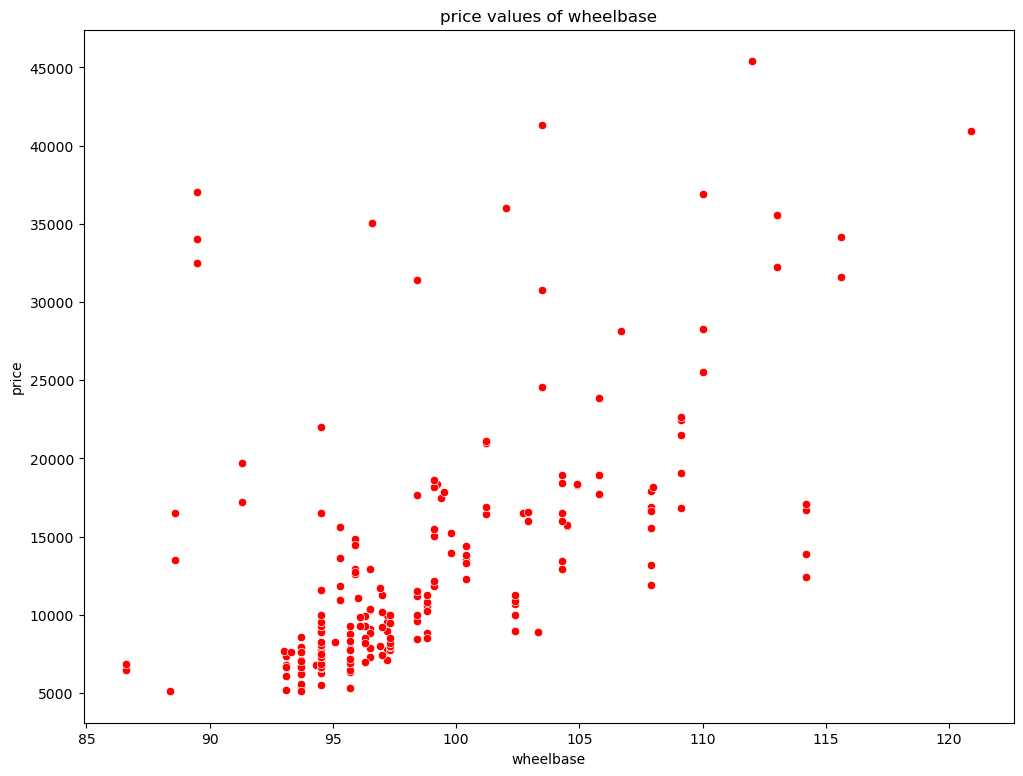

In [11]:
# give a plot which would show the price range according to the wheelbase 
plt.figure(figsize=(12,9))
sns.scatterplot(x="wheelbase", y="price", data=data,color='red')
plt.title('price values of wheelbase')
plt.show()

In [12]:
# check how many type of fuel is in the dataset
fuel=data['fueltype'].value_counts()
fuel

1    185
0     20
Name: fueltype, dtype: int64

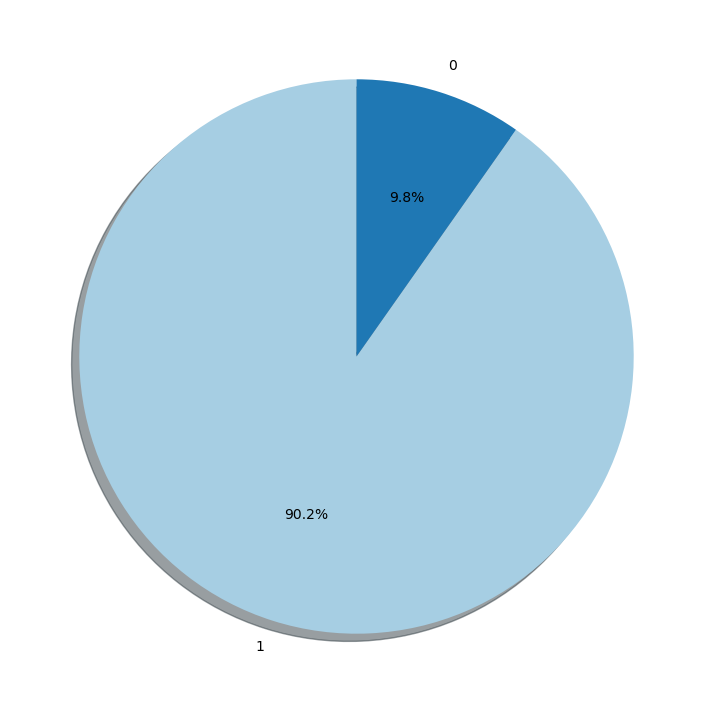

In [13]:
labels=fuel.index
sizes=fuel.values
plt.figure(figsize=(12,9))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

/var/folders/vl/hy77pwln09n_9zp1qzjffgw80000gn/T/ipykernel_21149/2676269988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


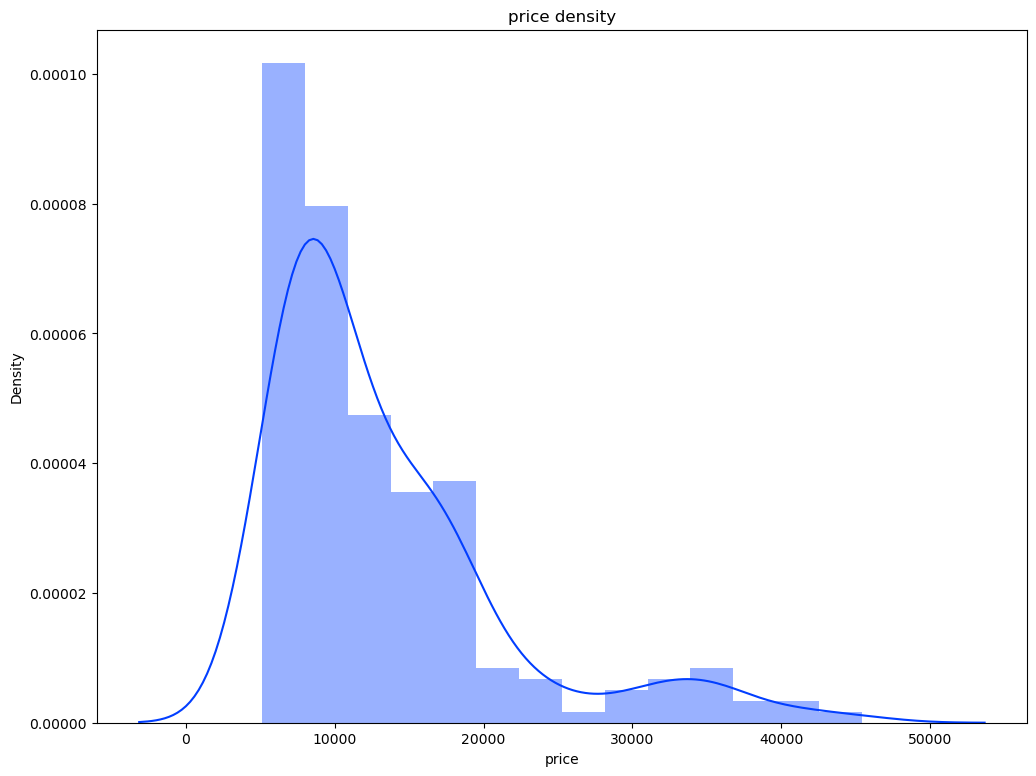

In [14]:
# display the price density
plt.figure(figsize=(12,9))
sns.distplot(data['price'])
plt.title('price density')
plt.show()

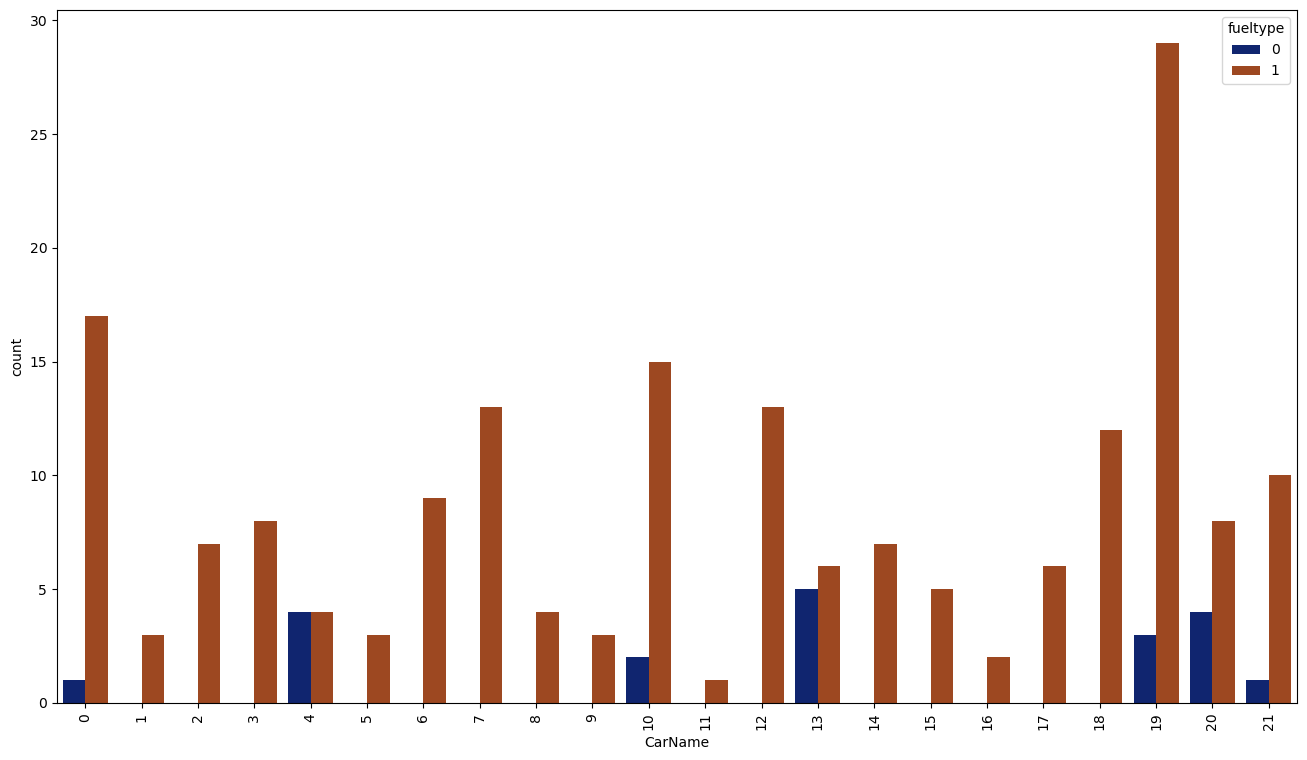

In [15]:
# check how many carnames are related to fuel type
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='CarName', hue='fueltype', data=data)
plt.xticks(rotation=90)
plt.show()

In [16]:
data.corr()

/var/folders/vl/hy77pwln09n_9zp1qzjffgw80000gn/T/ipykernel_21149/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
CarName,1.000000,-0.065597,0.060091,-0.143542,0.053781,-0.007548,0.060707,0.061688,0.057615,-0.033914,...,-0.157652,0.146779,0.201519,-0.201044,0.086201,-0.091439,-0.143058,0.053777,0.055715,-0.173728
fueltype,-0.065597,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.060091,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.143542,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.053781,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.007548,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.060707,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.061688,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.057615,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.033914,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,...,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


### Strength of Correlation:

##### Values close to 1 or -1 indicate a strong positive or negative correlation, respectively.
#### Values close to 0 suggest a weak or no linear correlation.

In [17]:
# Select columns with numerical data types (excluding 'object' data type columns).
numerical_cols = data.select_dtypes(exclude=['object']).columns

# display what is inside numerical coloumn
data[numerical_cols].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## let's split data to train and test data

In [18]:
# Create the feature matrix 'x' by dropping the 'price' column.
x = data.drop(['price'], axis=1)

# Create the target vector 'y' containing the 'price' column.
y = data['price']

# Split the dataset into training and testing sets.
# The test_size parameter defines the proportion of the dataset to be used for testing.
# The random_state parameter ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
# display the columns 
cols=x.columns
cols

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [20]:
# Get the column names from the feature matrix.
cols = x.columns

# Scale the feature matrix using the scale function from sklearn.preprocessing.
# Scaling standardizes the features by removing the mean and scaling to unit variance.
X = pd.DataFrame(scale(x))

# Assign the original column names to the scaled feature matrix.
X.columns = cols

In [21]:
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-1.541331,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,...,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,-1.541331,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,...,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,-1.541331,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,...,1.112210,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,-1.395654,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,...,-0.147475,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,-1.395654,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,...,-1.407161,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.372204,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,...,-0.147475,0.339248,0.869568,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,1.372204,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,...,-0.147475,0.339248,0.869568,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,1.372204,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,...,1.112210,1.109571,0.869568,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,1.372204,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,...,1.112210,0.435538,-0.126306,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


In [22]:
# Set up a list of degrees for polynomial regression.
degrees = [1, 2, 3, 6, 10, 20]

# Initialize arrays to store predicted values for training and testing sets.
# 'y_train_pred' will store predicted values for different degrees on the training set.
# 'y_test_pred' will store predicted values for different degrees on the testing set.
y_train_pred = np.zeros((len(x_train), len(degrees)))
y_test_pred = np.zeros((len(x_test), len(degrees)))


In [23]:
# Initialize a LinearRegression model.
lm = LinearRegression()

# Fit the LinearRegression model to the training data.
lm.fit(x_train, y_train)

LinearRegression()

In [24]:
# check if No leakage between training / test set
print(x_train.shape)
print(x_test.shape)
print(y_train_pred.shape)
print(y_test_pred.shape)

(143, 24)
(62, 24)
(143, 6)
(62, 6)


In [25]:
# Print R-squared values for different polynomial degrees.
print("R-squared values: \n")

# Loop through each degree and calculate R-squared for both training and testing sets.
for i, degree in enumerate(degrees):
    # Calculate R-squared score for the training set.
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    
    # Calculate R-squared score for the testing set.
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    
    # Print R-squared scores for the current degree.
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, train_r2, test_r2))

R-squared values: 

Polynomial degree 1: train score=-2.95, test score=-2.43
Polynomial degree 2: train score=-2.95, test score=-2.43
Polynomial degree 3: train score=-2.95, test score=-2.43
Polynomial degree 6: train score=-2.95, test score=-2.43
Polynomial degree 10: train score=-2.95, test score=-2.43
Polynomial degree 20: train score=-2.95, test score=-2.43


In [26]:
# Initialize a LinearRegression model.
lm = LinearRegression()

# Fit the LinearRegression model to the training data.
lm.fit(x_train, y_train)

# Initialize Recursive Feature Elimination (RFE) with a LinearRegression estimator.
# 'n_features_to_select' specifies the number of features to select.
rfe = RFE(lm, n_features_to_select=10)

# Fit the RFE to the training data to perform feature selection.
rfe = rfe.fit(x_train, y_train)

In [27]:
# Create a list of tuples containing column names, support status, and ranking from RFE.
list(zip(x_train.columns, rfe.support_, rfe.ranking_))


[('symboling', True, 1),
 ('CarName', False, 5),
 ('fueltype', True, 1),
 ('aspiration', True, 1),
 ('doornumber', False, 4),
 ('carbody', True, 1),
 ('drivewheel', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', False, 14),
 ('enginetype', False, 11),
 ('cylindernumber', True, 1),
 ('enginesize', False, 7),
 ('fuelsystem', False, 13),
 ('boreratio', False, 6),
 ('stroke', False, 3),
 ('compressionratio', True, 1),
 ('horsepower', False, 12),
 ('peakrpm', False, 15),
 ('citympg', True, 1),
 ('highwaympg', False, 10)]

In [28]:
# Predict the target variable using the RFE-selected model on the test set.
y_pred = rfe.predict(x_test)

# Calculate the R-squared score between predicted and actual values.
r2 = sklearn.metrics.r2_score(y_test, y_pred)

# Print the R-squared score.
print(r2)

0.6315372354886819


In [29]:
# Initialize a LinearRegression model.
lm = LinearRegression()

# Fit the LinearRegression model to the training data.
lm.fit(x_train, y_train)

# Initialize Recursive Feature Elimination (RFE) with a LinearRegression estimator.
# Select the top 6 features based on ranking.
rfe = RFE(lm, n_features_to_select=6)

# Fit the RFE to the training data to perform feature selection.
rfe = rfe.fit(x_train, y_train)

# Predict the target variable using the RFE-selected model on the test set.
y_pred = rfe.predict(x_test)

# Calculate the R-squared score between predicted and actual values.
r2 = sklearn.metrics.r2_score(y_test, y_pred)

# Print the R-squared score to evaluate the model's performance on the test set.
print(r2)

0.6914630753275529


In [30]:
# Initialize a LinearRegression model.
lm = LinearRegression()

# Perform 5-fold cross-validation and calculate R-squared scores for each fold.
# 'scoring' is set to 'r2' to calculate the R-squared score.
# 'cv' parameter determines the number of folds.
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)

# Print the R-squared scores for each fold.
print(scores)

[0.85169802 0.82793603 0.77869857 0.80701772 0.83658993]


# KFold

In [31]:
# Create a KFold cross-validation object with 5 splits, shuffling the data.
# 'random_state' ensures reproducibility of the shuffling.
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation using the KFold object and calculate R-squared scores for each fold.
# 'scoring' is set to 'r2' to calculate the R-squared score.
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)

# Print the R-squared scores for each fold.
print(scores)


[0.80531594 0.87731018 0.84326951 0.85816914 0.69868765]


In [32]:
# Perform 5-fold cross-validation and calculate negative mean squared error for each fold.
# 'scoring' is set to 'neg_mean_squared_error'.
# 'cv' parameter determines the number of folds.
scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Print the negative mean squared error scores for each fold.
print(scores)

[ -6126687.4590511   -5820101.54522819 -13639993.48621705
 -14206305.75434595 -14491440.63734723]


In [33]:
# Create a KFold cross-validation object with 5 splits, shuffling the data.
# 'random_state' ensures reproducibility of the shuffling.
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Define hyperparameters to search through. Here, you're specifying different numbers of features to select.
hyper_params = [{'n_features_to_select': list(range(1, 25))}]

# Initialize a LinearRegression model.
lm = LinearRegression()

# Fit the LinearRegression model to the training data.
lm.fit(x_train, y_train)

# Initialize Recursive Feature Elimination (RFE) with a LinearRegression estimator.
rfe = RFE(lm)

# Initialize GridSearchCV with RFE as the estimator, hyperparameter grid, scoring metric, cross-validation strategy, and verbosity.
model_cv = GridSearchCV(estimator=rfe,
                        param_grid=hyper_params,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Fit the GridSearchCV model to the training data to find the best combination of features.
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24]}],
             return_train_score=True, scoring='r2', verbose=1)

In [34]:
# Create a DataFrame to store the cross-validation results.
cv_results = pd.DataFrame(model_cv.cv_results_)

# Display the first 5 rows of the DataFrame.
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025841,0.003526,0.000947,0.000081,1,{'n_features_to_select': 1},0.201291,-0.037002,0.191169,-0.028961,...,0.054816,0.115754,24,0.056206,0.121273,0.058585,0.126501,0.100252,0.092563,0.030038
1,0.027643,0.003751,0.000986,0.000038,2,{'n_features_to_select': 2},0.488141,0.417783,0.411928,0.188121,...,0.366768,0.102763,23,0.362437,0.381226,0.382239,0.456486,0.395955,0.395669,0.032224
2,0.025263,0.003734,0.001069,0.000321,3,{'n_features_to_select': 3},0.779299,0.415928,0.410315,0.696788,...,0.508622,0.199333,22,0.749161,0.381751,0.382749,0.773437,0.399468,0.537313,0.183153
3,0.027393,0.008081,0.001248,0.000545,4,{'n_features_to_select': 4},0.796569,0.797381,0.751922,0.721189,...,0.732352,0.074576,16,0.756100,0.755769,0.766268,0.775979,0.783243,0.767472,0.010852
4,0.020985,0.001801,0.001310,0.000601,5,{'n_features_to_select': 5},0.790789,0.808523,0.714375,0.736855,...,0.730183,0.073424,17,0.756973,0.761232,0.781111,0.778750,0.790332,0.773680,0.012588


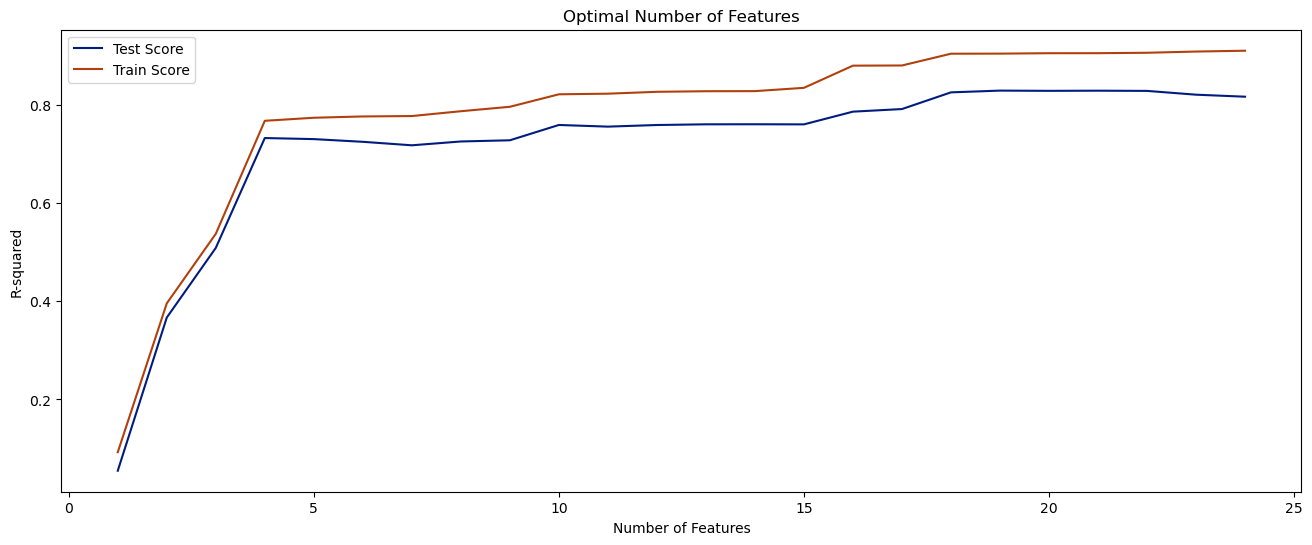

In [35]:
# Set the figure size for the plot.
plt.figure(figsize=(16, 6))

# Plot the mean test scores against the number of features selected.
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])

# Plot the mean train scores against the number of features selected.
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])

# Add labels and title to the plot.
plt.xlabel('Number of Features')
plt.ylabel('R-squared')
plt.title("Optimal Number of Features")

# Add a legend to the plot.
plt.legend(['Test Score', 'Train Score'], loc='upper left')

# Display the plot.
plt.show()

In [36]:
# Define the number of optimal features to select.
n_features_optimal = 10

# Initialize a LinearRegression model.
lm = LinearRegression()

# Fit the LinearRegression model to the training data.
lm.fit(x_train, y_train)

# Initialize Recursive Feature Elimination (RFE) with the specified number of optimal features.
rfe = RFE(lm, n_features_to_select=n_features_optimal)

# Fit the RFE to the training data to perform feature selection.
rfe = rfe.fit(x_train, y_train)

# Predict the target variable using the Linear Regression model on the test set.
y_pred = lm.predict(x_test)

# Calculate the R-squared score between predicted and actual values.
r2 = sklearn.metrics.r2_score(y_test, y_pred)

# Print the R-squared score to evaluate the model's performance on the test set.
print(r2)

0.8183255212584257


## Classification

In [37]:
# Load the dataset
file_path = "CarPrice_Assignment.csv"
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
# Define a threshold for classifying car prices into "High Price" or "Low Price"
# Calculate the 75th percentile of the 'price' column
price_threshold = car_data['price'].quantile(0.75)

# Create a new binary column 'price_class' where 1 represents 'High Price' and 0 represents 'Low Price'
car_data['price_class'] = (car_data['price'] > price_threshold).astype(int)

# Display the first few rows of the dataframe to check the new column
car_data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_class
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [39]:
# Step 3: Preprocess the Data
# 3.1 Handle Categorical Variables: One-Hot Encoding
# Select the categorical columns
categorical_cols = car_data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
car_data_encoded = pd.get_dummies(car_data, columns=categorical_cols, drop_first=True)

# 3.2 Scale the Numerical Features
# Define the feature set X and target y
X = car_data_encoded.drop(['car_ID', 'price', 'price_class'], axis=1)
y = car_data_encoded['price_class']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the feature set and transform it
X_scaled = scaler.fit_transform(X)

# 3.3 Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [40]:
# Implement the function metrics
def metrics(y, ypred):
    """ 
    Calculate the different metrics for model evaluation
    
    Parameters:
        y (pd.series): Actual labels
        ypred (pd.series): Predicted outcomes
    
    Returns:
        dict: A dictionary include accuracy, sensitivity, specificity, precision, and f1-score
    """
    
    # Calculate the confusion matrix for the data
    tn, fp, fn, tp = confusion_matrix(y, ypred).ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y, ypred)
    sensitivity = recall_score(y, ypred)
    specificity = tn / (tn + fp)
    precision = precision_score(y, ypred)
    f1 = f1_score(y, ypred)
    
    return {'Accuracy': accuracy,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Precision': precision,
            'F1_Score': f1
           }

In [41]:
# Revised Logistic Regression algorithm
class LogisticRegression:
    """ 
    Represent the Logistic Regression model
    
    Attributes:
        weights (np.array): stores the weights of fitting the model
    """
    
    def __init__(self):
        self.weights = None
        self.cross_entropy = []

    def _sigmoid(self, z):
        """ 
        Computes the sigmoid for the given input.
        
        Parameters:
            z (float): Input to the sigmoid
            
        Returns:
            a float: output of Sigmoid of z
        """
        return 1 / (1 + np.exp(-z))
    
    def fit(self, train_data, labels, learning_rate=0.0001, max_iter=1000, lamdba=0.0):
        """ 
        Fits the model to the provided training data by using gradient descent
        
        Parameters:
            train_data (np array or dataframe): Training data
            labels (np array or pd series): labels of training data
            learning_rate (float): learning rate of the algorithm
            max_iter (int): Max number of iteration for the gradient descent
            lamdba (float): Regularization parameter
        """
        # For ease, convert the computation to numpy arrays
        train_data = np.array(train_data)
        labels = np.array(labels)
        
        # Add a bias column to the training data
        train_data = np.insert(train_data, 0, 1, axis=1)
        
        # Initialize the weights
        self.weights = np.zeros(train_data.shape[1])
        
        # Use for loop to update the weights:
        for iteration in range(max_iter):
            z = np.dot(train_data, self.weights)
            prediction = self._sigmoid(z)
            gradient = np.dot(train_data.T, (prediction - labels)) + lamdba * self.weights
            self.weights -= learning_rate * gradient
            
            # Compute the loss                  
            loss = -np.mean(labels * np.log(prediction) + (1 - labels) * np.log(1 - prediction))
            self.cross_entropy.append(loss)
            
    def predict_prob(self, test_data):
        """ 
        Get the probability of the positive class data
        
        Parameters:
            test_data (numpy array or pd series): Provided test data
        
        Returns:
            A np array of probabilities
        """
        if self.weights is None:
            raise ValueError("The model must be fitted before making predictions.")
        
        # Convert the test data to numpy array (if it isn't already)
        test_data = np.array(test_data)
        
        # Add a bias column to the test data
        test_data = np.insert(test_data, 0, 1, axis=1)
        z = np.dot(test_data, self.weights)
        return self._sigmoid(z)
        
    def predict(self, test_data):
        """ 
        Predict the labels for the test data.
            
        Parameters:
            test_data (numpy array or pd series): Provided test data
                
        Returns:
            A numpy array which predicted labels for the test data
        """
        if self.weights is None:
            raise ValueError("The model must be fitted before making predictions.")
                
        probabilities = self.predict_prob(test_data)
        return np.where(probabilities >= 0.5, 1, 0)

# Create an instance of Logistic Regression class
logistic_regression = LogisticRegression()

# Fit the model of the dataset
logistic_regression.fit(X_train, y_train)

# Predict the labels for the training data
prediction = logistic_regression.predict(X_test)

# The probability for training data
prob = logistic_regression.predict_prob(X_test)

# Calculate the metrics
metrics_result_log = metrics(y_test, prediction)

# Get the Mean Cross Entropy for each iteration.
loss_result_log = logistic_regression.cross_entropy

# Display the metrics and the Mean Cross Entropy for each iteration.
metrics_result_log, loss_result_log[:20]


({'Accuracy': 0.8536585365853658,
  'Sensitivity': 1.0,
  'Specificity': 0.8125,
  'Precision': 0.6,
  'F1_Score': 0.7499999999999999},
 [0.6931471805599454,
  0.6740906120426208,
  0.6564335127702248,
  0.6400551853646793,
  0.6248429892967631,
  0.6106927418508739,
  0.59750877670325,
  0.5852037487758022,
  0.5736982633857031,
  0.5629203939261906,
  0.552805138161853,
  0.5432938503307192,
  0.5343336753710997,
  0.5258770029144023,
  0.5178809520609328,
  0.5103068930876408,
  0.5031200087863298,
  0.4962888957768712,
  0.4897852046057183,
  0.4835833165009772])

- **The Sensitivity (also known as Recall) of 100% means that all the positive (High Price) samples were correctly identified by the model.**

- **The Specificity of 81.25% means that 81.25% of the negative (Low Price) samples were correctly identified by the model.**

- **The Precision of 60% means that 60% of the samples identified as positive (High Price) by the model were actually positive.**

- **The F1 Score is the harmonic mean of precision and recall and is 75% for this model.**


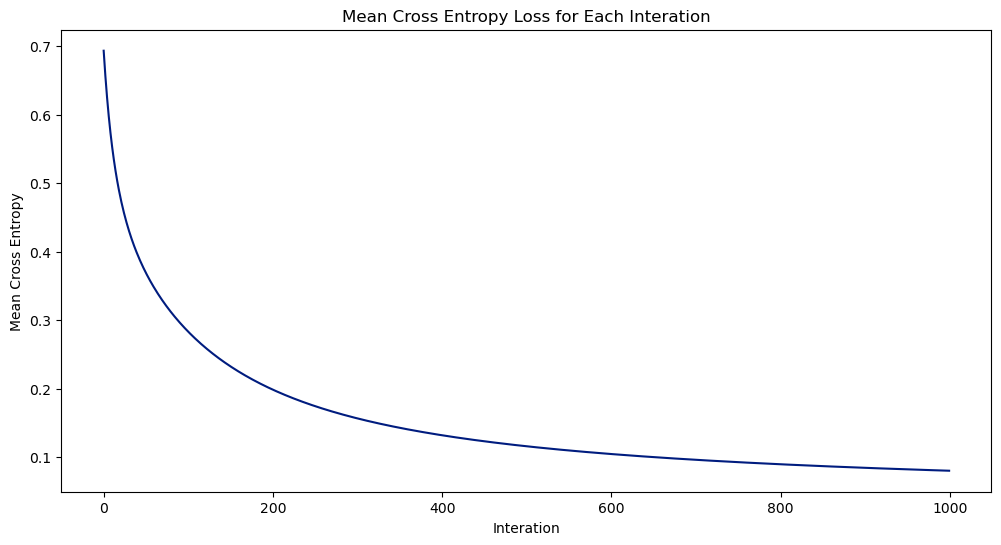

In [42]:
# set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the mean perceptron loss for each iteration
plt.plot(range(len(logistic_regression.cross_entropy)), logistic_regression.cross_entropy)
plt.title('Mean Cross Entropy Loss for Each Interation')
plt.xlabel('Interation')
plt.ylabel('Mean Cross Entropy')

plt.show()


In [43]:
def cross_validation_evaluation(model, features_std, target, cv_strategy):
    """ 
    Evaluate the model by using cross-validation and return mean metrics.
    
    Parameters:
        model(object): The model to evaluate.
        features_std (pd.DataFrame): The features.
        target (pd.Series): Labels.
        cv_strategy (object): KFold or StratifiedKFold
        
    Returns:
        dict: Mean metrics.
    """
    # Create an empty list of the results
    metrics_results = []
    for train_index, test_index in cv_strategy.split(features_std, target):
        # Split the data
        X_train, X_test = features_std.iloc[train_index, :], features_std.iloc[test_index, :]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)
        
        # Make prediction
        y_pred = model.predict(X_test)
    
        # Calculate the metrics
        metrics_results.append(metrics(y_test, y_pred))
    
    # Calculate the mean metrics
    mean_metrics = {key: np.mean([m[key] for m in metrics_results]) for key in metrics_results[0]}
    
    return mean_metrics

# Prepare the data in the form of DataFrame
features_std_df = pd.DataFrame(X_train)
target_series = pd.Series(y_train)

# Create 10-fold cross-validation strategies
random_kf = KFold(n_splits=10, shuffle=True, random_state=42)
stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation for the Logistic Regression
# g-i: 10-fold random cross-validation
random_cv_log = cross_validation_evaluation(LogisticRegression(), features_std_df, target_series, random_kf)

# g-ii: 10-fold stratified cross-validation
stratified_cv_log = cross_validation_evaluation(LogisticRegression(), features_std_df, target_series, stratified_kf)

print('10-fold random cross-validation metrics:\n', random_cv_log, 
      '\n10-fold Stratified cross-validation metrics:\n', stratified_cv_log)

10-fold random cross-validation metrics:
 {'Accuracy': 0.8165441176470587, 'Sensitivity': 0.8790476190476191, 'Specificity': 0.7893872793872795, 'Precision': 0.5991666666666666, 'F1_Score': 0.7033193930252755} 
10-fold Stratified cross-validation metrics:
 {'Accuracy': 0.8036764705882353, 'Sensitivity': 0.8550000000000001, 'Specificity': 0.785897435897436, 'Precision': 0.5975, 'F1_Score': 0.6998989898989899}


- **Both cross-validation strategies yield fairly consistent results, indicating that the model performs similarly across different splits of the dataset.**

### The Sensitivity (Recall) and Specificity values in both cross-validation strategies are good, indicating that the model is able to classify both "High Price" and "Low Price" samples effectively.



### Linear Kernel

In [44]:
# Define the parameter grid for C at first
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize the SVM with linear kernel
svc_linear = SVC(kernel='linear', probability=True)

# Use AUC as scoring metric
auc_scorer = make_scorer(roc_auc_score)

# Perform a grid search with 10-Fold cross-validation
grid_search_linear = GridSearchCV(svc_linear, 
                                  param_grid, 
                                  cv=StratifiedKFold(10), 
                                  scoring=auc_scorer, # scoring with the AUC metric
                                  return_train_score=True)

grid_search_linear.fit(X_train, y_train)

# Get the optimal C value for each fold
best_C_linear = [fold['C'] for fold in grid_search_linear.cv_results_['params']]

# Display the result
best_C_linear, grid_search_linear.best_params_, grid_search_linear.best_score_


([0.001, 0.01, 0.1, 1, 10, 100, 1000], {'C': 0.1}, 0.7687820512820512)

### Polynomial kernel

In [45]:
# Define the parameter grid for C for Polynomial kernel
param_grid_poly = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize the SVM with Polynomial kernel of degree 2
svc_poly = SVC(kernel='poly', degree=2, probability=True)

# Perform a grid search with 10-Fold cross-validation for Polynomial kernel
grid_search_poly = GridSearchCV(svc_poly, 
                                param_grid_poly, 
                                cv=StratifiedKFold(10), 
                                scoring=auc_scorer, # scoring with the AUC metric
                                return_train_score=True)

grid_search_poly.fit(X_train, y_train)

# Get the optimal C value for each fold
best_C_poly = [fold['C'] for fold in grid_search_poly.cv_results_['params']]

# Display the result
best_C_poly, grid_search_poly.best_params_, grid_search_poly.best_score_


([0.001, 0.01, 0.1, 1, 10, 100, 1000], {'C': 10}, 0.5481410256410256)

### RBF kernel

In [46]:
# Define the parameter grid for C for RBF kernel
param_grid_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  'gamma': ['scale', 'auto']}

# Initialize the SVM with RBF kernel
svc_rbf = SVC(kernel='rbf', probability=True)

# Perform a grid search with 10-Fold cross-validation for RBF kernel
grid_search_rbf = GridSearchCV(svc_rbf, 
                               param_grid_rbf, 
                               cv=StratifiedKFold(10), 
                               scoring=auc_scorer, # scoring with the AUC metric
                               return_train_score=True)

grid_search_rbf.fit(X_train, y_train)

# Get the optimal C value for each fold
best_params_rbf = [fold for fold in grid_search_rbf.cv_results_['params']]

# Display the result
best_params_rbf, grid_search_rbf.best_params_, grid_search_rbf.best_score_


([{'C': 0.001, 'gamma': 'scale'},
  {'C': 0.001, 'gamma': 'auto'},
  {'C': 0.01, 'gamma': 'scale'},
  {'C': 0.01, 'gamma': 'auto'},
  {'C': 0.1, 'gamma': 'scale'},
  {'C': 0.1, 'gamma': 'auto'},
  {'C': 1, 'gamma': 'scale'},
  {'C': 1, 'gamma': 'auto'},
  {'C': 10, 'gamma': 'scale'},
  {'C': 10, 'gamma': 'auto'},
  {'C': 100, 'gamma': 'scale'},
  {'C': 100, 'gamma': 'auto'},
  {'C': 1000, 'gamma': 'scale'},
  {'C': 1000, 'gamma': 'auto'}],
 {'C': 1000, 'gamma': 'scale'},
 0.7481410256410256)

### Comparison:
- **Effectiveness: Among the three, the SVM with a Linear kernel and the SVM with an RBF kernel performed similarly, with the RBF kernel slightly outperforming the Linear kernel based on AUC. The SVM with a Polynomial kernel (degree 2) performed significantly worse.**
- **Complexity and Interpretability: The Linear kernel is generally more interpretable and simpler, which can be beneficial when we need to explain the model. The RBF kernel can capture more complex relationships but may risk overfitting, especially with a high C value, as seen here.**
- **Choice of Hyperparameters: The choice of C and gamma (for RBF) are crucial. For the RBF kernel, both a high C and the scaled gamma were chosen, indicating the need for a complex model to fit this data well.**

### Recommendations:
**Given the results, both the Linear and RBF kernels seem to be reasonable choices for this dataset, with a slight edge to the RBF kernel based on AUC. For the Polynomial kernel, trying different polynomial degrees might help improve the performance. It might be beneficial to explore further hyperparameter tuning or try different feature engineering techniques to potentially improve the performance of all three models.**

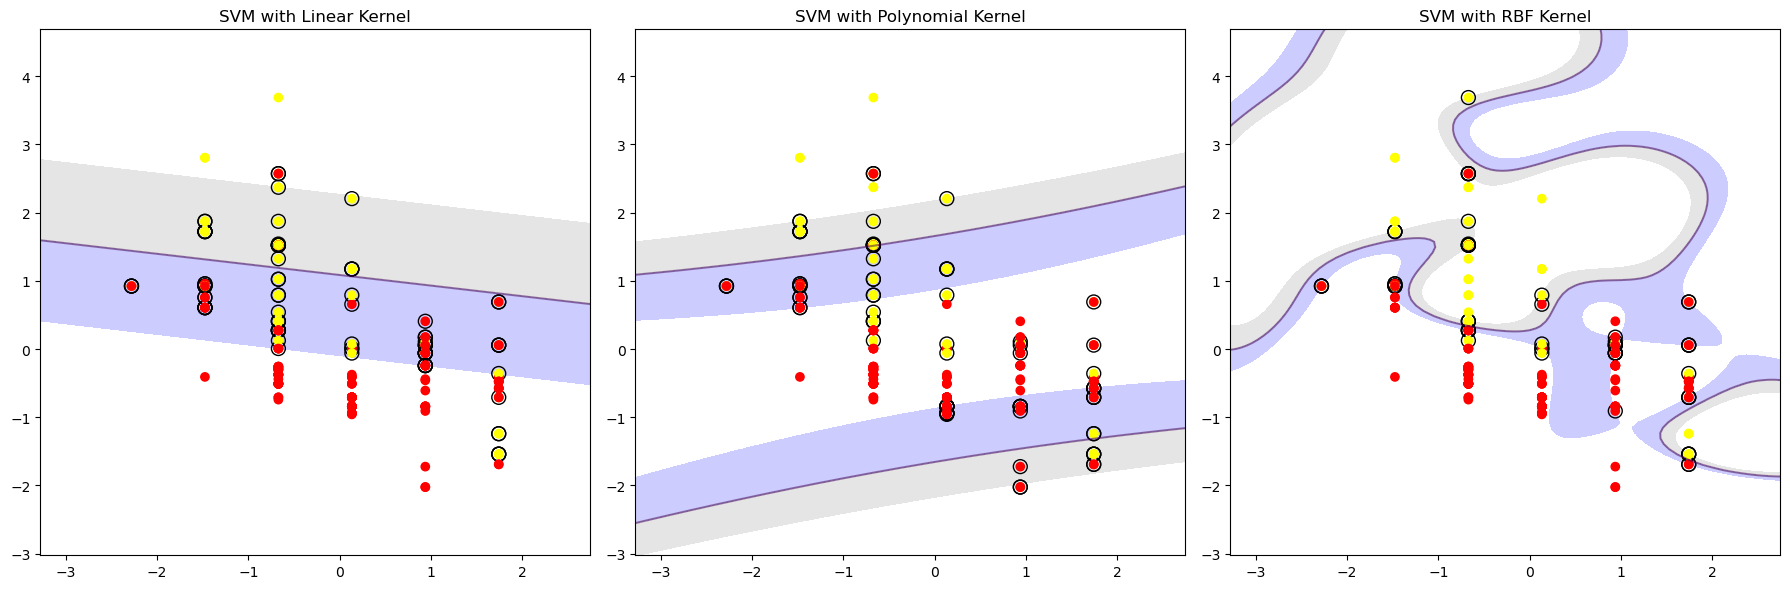

In [47]:
def plot_decision_boundary(model, X, y, ax, title):
    """
    Plot the SVM decision boundary and support vectors.
    """
    # Create grid to cover feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, y1 = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict class labels for each mesh grid point
    Z = model.decision_function(np.c_[x1.ravel(), y1.ravel()])
    Z = Z.reshape(x1.shape)
    
    # Plot decision boundary
    ax.contour(x1, y1, Z, levels=[0], alpha=0.5, linestyles=['-'])
    ax.contourf(x1, y1, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'gray', 'red'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax.set_title(title)

# Select the first two features from the dataset for visualization
X_2D_train = X_train[:, :2]
X_2D_test = X_test[:, :2]    

# Concatenate the training and test sets along rows for both the features and the target variable
X_visualize = np.vstack((X_2D_train, X_2D_test))
y_visualize = np.concatenate((y_train, y_test))

# Initialize the models with their respective optimal hyperparameters
svc_linear_optimal = SVC(kernel='linear', C=grid_search_linear.best_params_['C']).fit(X_visualize, y_visualize)
svc_poly_optimal = SVC(kernel='poly', degree=2, C=grid_search_poly.best_params_['C']).fit(X_visualize, y_visualize)
svc_rbf_optimal = SVC(kernel='rbf', C=grid_search_rbf.best_params_['C'], gamma=grid_search_rbf.best_params_['gamma']).fit(X_visualize, y_visualize)

# Plot decision boundaries and support vectors
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_decision_boundary(svc_linear_optimal, X_visualize, y_visualize, axes[0], "SVM with Linear Kernel")
plot_decision_boundary(svc_poly_optimal, X_visualize, y_visualize, axes[1], "SVM with Polynomial Kernel")
plot_decision_boundary(svc_rbf_optimal, X_visualize, y_visualize, axes[2], "SVM with RBF Kernel")

plt.tight_layout()
plt.show()


### Analysis:

- **The Linear Kernel SVM provides a simple and interpretable decision boundary, which might work well if the true boundary between classes is linear in the feature space.**
- **The Polynomial Kernel SVM allows for a more complex, curved decision boundary, which might be more useful if the true relationship between classes is non-linear.**
- **The RBF Kernel SVM is the most flexible model and is capable of modeling very complex relationships. However, this flexibility might lead to overfitting if the model is too complex relative to the true underlying relationships.**